SILVA-MARTINS Merlin

BRAUSCH Sébastien

# Devoir : physique statistique partie info.

# Partie 1 : Génération de nombres aléatoires

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Ici nous essayons une des nombreuses fonction en loi normal de python de moyenne 0 et de variance 1.

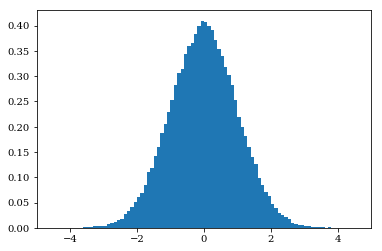

In [2]:
x=numpy.random.randn(100000)
binwidth=0.1
pyplot.xlim(-5,5)
bins=numpy.arange(-21.,21., binwidth)
pyplot.hist(x,bins,density=True);

On retrouve bien une distribution Gaussienne.

Nous allons maintenant nous intéresser à deux fonctions en particulier, à savoir la fonction exponentielle et la fonction Gaussienne.  Nous avons vu lors du cours une manière pour générer des nombres aléatoires qui suivent une distribution Gaussienne ou exponentielle mais python à deux fonction qui font déjà le travail pour nous. Les fonctions numpy.random.exponential() et numpy.random.normal().

# FONCTION EXP

Ici nous implémentons la version vu au cours pour obtenir une distribution en exponentielle négative et nous la superposons à la fonction numpy.random.exponential().  Pour cette méthode nous utilisons le fait que l'on peut inversier la fonction cumulative de la distribution.  En partant d'un échantillon réparti uniformément on peut créer un échantillion de distribution exponentielle.

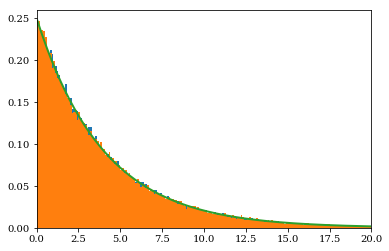

In [3]:
alpha = 0.25 # paramètre de notre distribution
x = numpy.random.random_sample(100000)
y = -1/alpha*numpy.log(1-x) # solution méthode inverse

binwidth=0.1
pyplot.xlim(0,20)
bins=numpy.arange(0.,21., binwidth)
pyplot.hist(y,bins,density=True);



#solution analytique
y1 = numpy.random.exponential(1/alpha,100000)#solution fonction python
binwidth1=0.1
pyplot.xlim(0,20)
bins1=numpy.arange(0.,21., binwidth1)
pyplot.hist(y1,bins1,density=True);


xc = bins[:-1] + binwidth/2
pyplot.plot(xc,alpha*numpy.exp(-alpha*xc), lw=2)#fonction analytique


Nous voyons qu'en effet les deux méthode nous donne une distribution qui suit bien une loi exponentielle.

In [4]:
print("Nombre d'élément de la méthode des distributions inversibles:",len(y))
print("Nombre d'élément de la fonction built-in:",len(y1))

Nombre d'élément de la méthode des distributions inversibles: 100000
Nombre d'élément de la fonction built-in: 100000


Remarquons qu'ici on obtient le même nombre d'éléments pour les deux méthodes.

# FONCTION GAUSSIENNE


Afin d'obtenir une distribution Gaussienne il est possible d'utiliser la méthode de Van Neumann qui, en partant d'une distribution nous en donne une autre, pour autant que ces dernières satisfont une certaine condition .  Dans ce cas-ci nous partirons d'une distribution exponentielle pour obtenir une distribution Gaussienne. Ensuite nous la superposerons avec la distribution donnée par la fonction numpy.random.normal().

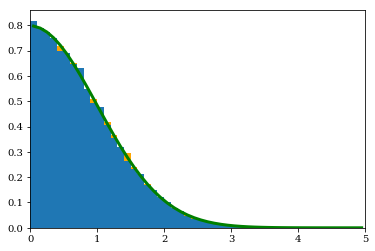

In [5]:
N = 100000
K = 1.4

h=[]

for i in range(N):
    u1 = numpy.random.random_sample()
    
    g = numpy.log(1/(1-u1))
    
    u2 = numpy.random.random_sample()
    
    ratio = 2*numpy.exp(-g**2/2.0)/numpy.sqrt(2*numpy.pi) / \
                (K*numpy.exp(-g))
    if (u2<ratio):
        h.append(g)


binwidth=0.1
bins=numpy.arange(0.,5.1, binwidth)
pyplot.hist(h,bins=numpy.arange(0.,5., binwidth),density=True,color='orange');

xc = bins[:-1] + binwidth/2
pyplot.plot(xc,2*numpy.exp(-xc**2/2.0)/numpy.sqrt(2*numpy.pi),lw=3,color='green')




y = numpy.random.normal(0,1,100000)

# Plots
binwidth=0.1
pyplot.xlim(0,5)
bins=numpy.arange(0.,5., binwidth)
pyplot.hist(y,bins,density=True);

Une foi de plus on remarque que les deux fonctions nous donnes bien des distributions similaires.

In [6]:
print("Nombre d'élément de la méthode de Von Neumann:",len(h))
print("Nombre d'élément de la built-in fonction:",len(y))

Nombre d'élément de la méthode de Von Neumann: 71396
Nombre d'élément de la built-in fonction: 100000


Cette fois-ci en revanche le nombre d'éléments n'est pas le même.  En effet la méthode de Von Neumann ne permet pas à tout les points des rester donc on perd certains points.

# Méthode de Box muller


Nous allons ici nous intéresser à la méthode de Box-Muller qui, à partir de deux distributions uniformes peut nous donner deux distributions normale.

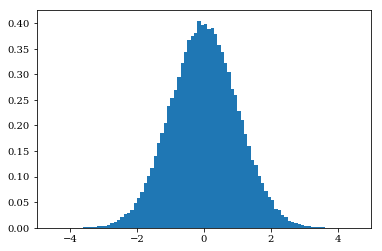

In [7]:
x = numpy.random.random_sample(100000)
y = numpy.random.random_sample(100000)
X = ((-2*numpy.log(x))**(1/2))*numpy.cos(2*numpy.pi*y)
Y = ((-2*numpy.log(x))**(1/2))*numpy.sin(2*numpy.pi*y)
binwidth=0.1
pyplot.xlim(-5,5)
bins=numpy.arange(-5.,5., binwidth)
pyplot.hist(X,bins,density=True);



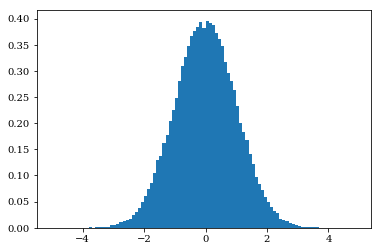

In [8]:
pyplot.hist(Y,bins,density=True);

In [9]:
print("Nombre d'élément de la méthode de Box-Muller:",len(X))


Nombre d'élément de la méthode de Box-Muller: 100000


Cette méthode nous donne bien deux distribution normale et nous donnes le même nombre d'éléments que ceux de départ.

# Partie 2 : Mouvement Brownien

Dans cette partie nous nous intéresserons au célèbre mouvement Brownien. Nous comparerons le cas vu au cours avec quelques modifications.

# ajout systématique

Ici la différence par rapport au cours c'est que nous rajouterons une certaine contribution constante à chaques itérations notre déplacement s'écrit donc:
$$
dx = c dt + \sqrt{2\alpha dt}N
$$
Ou N est un nombre aléatoire entre 0 et 1 distribué selon une loi normale centrée réduite.
On peut déjà se dire qu'une contribution constante de ce type aura pour effet de décaller tout les points de la même manière. On peut donc s'attendre à un sertain changement de la moyenne:

$$
\mu \rightarrow \mu + cT
$$
En revanche la variance ne devrait pas changer car si on applique la transformation suivante sur un échantillon:
$$
X \rightarrow aX+b
$$
la variance change de la façon suivante:
$$
\sigma \rightarrow a^2 \sigma
$$
mais ici a = 0 et b = CT

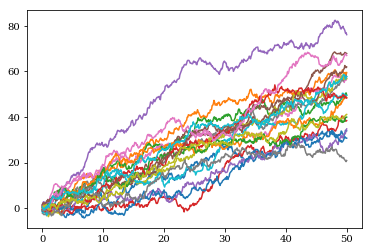

In [10]:
# mu =0
npart=100000
c=1.0
sigma = 1.0
x0 = numpy.random.normal(loc=0,scale=sigma,size=npart)
T=50.0
nt=500
dt=T/nt
alpha=2.0

t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]+c*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])


On voit donc bien que nos points se décalent "ensemble" du cas ou il n'y avait pas d'ajout systématique.

la nouvelle moyenne est: 50.0


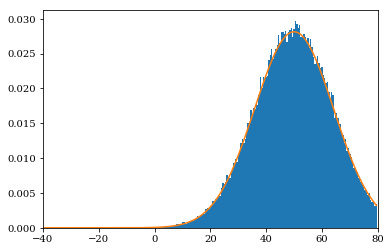

In [11]:
binwidth=0.5
bins=numpy.arange(-50,80,binwidth)
bins = bins + binwidth/2
mu = c*T

bin_centers = bins[:-1]+binwidth/2


pyplot.xlim(-40,80)
pyplot.hist(x[nt],bins,density=True);

sigmat2=2*alpha*T+sigma**2
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-(mu))**2/(2.0*sigmat2))/numpy.sqrt(2*numpy.pi*sigmat2))
print("la nouvelle moyenne est:",mu)

Comme on s'y attendait notre distribution s'est décallée sur la droite et la variance n'a pas changée.


# terme de friction
Dans ce cas-ci nous n'aurons pas un ajout constant à chaque fois moi un terme de freinage:
$$
dx = -\gamma dt + \sqrt{2\alpha dt}N
$$

On peut s'imaginer à peu près ce que se therme changera.  On voit que celui-ci va diminuer plus fort le déplacement des points plus loin (plus grand x) et moin fort celui des points les plus proches (plus petit x). Ceci aurait pour effet de modifier notre variance.

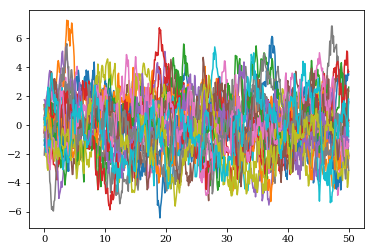

In [12]:
gamma=0.5
t = numpy.arange(0,T+dt,dt)
x = numpy.empty([nt+1,npart])

x[0]=x0

for i in range(nt):
    x[i+1]=x[i]-gamma*x[i]*dt+numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1,npart)

for i in range(20):
    pyplot.plot(t,x[:,i])

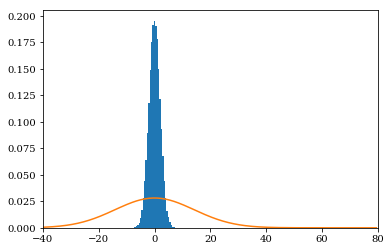

In [13]:
binwidth=0.5
bins=numpy.arange(-50,80,binwidth)
bins = bins + binwidth/2


bin_centers = bins[:-1]+binwidth/2


pyplot.xlim(-40,80)
pyplot.hist(x[nt],bins,density=True);

sigmat1=2*alpha*T+sigma**2
sigmat = sigmat1
pyplot.plot(bin_centers, numpy.exp(-bin_centers**2/(2.0*sigmat))/numpy.sqrt(2*numpy.pi*sigmat))

En effet on remarque que nos points sont beacoup plus rapprochés de la moyenne.  En revanche nous n'avons pas réussi à transformer de manière satisfaisante l'équation analytique de la solution.

# partie 3 
Dans cette partie nous nous intéresserons au modèle d'ising qui essaye de décrire le ferromagnétisme et se qu'on appelle les transitions de phase d'un matériau.
Dans un premier temp nous implémentons les routines et fonctions vu au cours qui nous seront utiles.

In [14]:
def initial_state(nx,ny):
 
     
    r = numpy.random.randint(0,2,(nx,ny))
    

    r[r==0] =-1

    return r



def energy_at_site(sp,alpha,sigma,ix,iy):
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

def metropolis_at_site(sp,alpha,ix,iy):
    
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    
    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [15]:
NMC = 1000000
alpha = 0.1
nx = 10
ny = 10
for i in range (5):
    sp = initial_state(10,10)
    states = numpy.empty(NMC+1)
    states[0]=sp[5,5]
    for n in range(0,NMC):
        metropolis_at_site(sp,alpha,5,5)
        states[n]=sp[5,5]

    ups = numpy.extract(states==1, states).size
    downs = NMC - ups
    print("Véritable ratio:",ups/downs)
    print("Ratio metropolis:",numpy.exp(energy_at_site(sp,alpha,-1,5,5)-energy_at_site(sp,alpha,1,5,5)))

Véritable ratio: 1.0
Ratio metropolis: 1.0
Véritable ratio: 1.4914853488204063
Ratio metropolis: 1.4918246976412703
Véritable ratio: 1.0
Ratio metropolis: 1.0
Véritable ratio: 1.0
Ratio metropolis: 1.0
Véritable ratio: 0.670369318656355
Ratio metropolis: 0.6703200460356393


Ici on remarque que pour différents états initiales le ratio donné par l'algorithm métropolis est assez proche du véritable ratio. 
Nous allons maintenant ragarder comment la magnétisation(nombre de 1 et -1) évolue en fonction du paramètre $\alpha$ qui dépend de la température.  On crée donc une routine qui donne des états initiaux utilisant l'algorithm metropolis.

In [16]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):

    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
    return states

Maintenant il ne nous rest plus qu'à appliquer cette routine pour différentes valeurs de $\alpha$ et regarder comment le nombre de spin up et down évolue pour chaque cas.

In [17]:
nx = 100
ny = 100

sp = numpy.ones([nx,ny])
states1 = []
NMC=100
alpha_values = numpy.linspace(0.1,1,10)
for i in alpha_values:
    sp = numpy.ones([nx,ny])
    state1 = ising_model_metropolis(sp, NMC, nx, ny, i)
    states1.append(state1)


Regardons ce que ca donne.

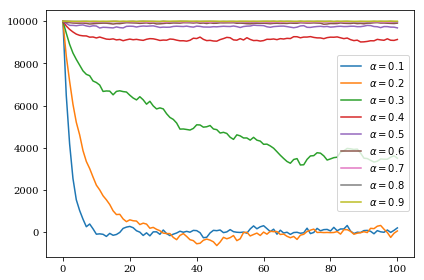

In [18]:
pyplot.figure()

pyplot.plot(states1[1].sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states1[2].sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states1[3].sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states1[4].sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states1[5].sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states1[6].sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states1[7].sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states1[8].sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states1[9].sum(axis=(1,2)),label=r'$\alpha=0.9$')


pyplot.legend()
pyplot.tight_layout()

On voit que pour des valeurs de $ \alpha $ inférieures à 0.4 la magnétisation tend vers zéro alors qu'lle est conservée pour des valeurs plus grandes, on a le même nombre de spin up et down. 
Ceci est en accord avec la solution exacte de Onsager donnée par :

$$
m(\alpha) = \left( 1-\frac{1}{sinh(\alpha)^{1/4}}\right)^{1/8}
$$
où $m(\alpha)$ est la magnétisation et selon cette équation elle s'annule pour une valeur de $\alpha \approx 0.4$

Nous allons maintenant refaire cette analyse pour une orientation de départ aléatoire et nous imposerons certaines conditions aux bords.  Ici nous imposons des spins down sur les deux bords qui forme le coin supérieur gauche et des spins up pour les deux autres bords.

In [19]:
states2 = []
for i in alpha_values:
    sp = initial_state(nx,ny)
    sp[0,:] =-1
    sp[:,0] =-1
    sp[-1,:] =1
    sp[:,-1] =1
    state2 = ising_model_metropolis(sp, NMC, nx, ny, i)
    states2.append(state2)


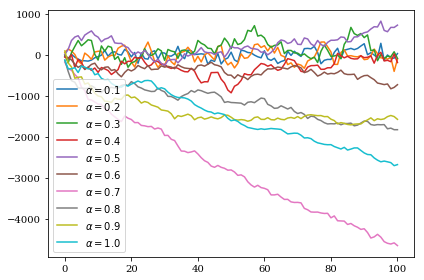

In [20]:
pyplot.figure()

pyplot.plot(states2[0].sum(axis=(1,2)),label=r'$\alpha=0.1$')
pyplot.plot(states2[1].sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states2[2].sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states2[3].sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states2[4].sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states2[5].sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states2[6].sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.plot(states2[7].sum(axis=(1,2)),label=r'$\alpha=0.8$')
pyplot.plot(states2[8].sum(axis=(1,2)),label=r'$\alpha=0.9$')
pyplot.plot(states2[9].sum(axis=(1,2)),label=r'$\alpha=1.0$')

pyplot.legend()
pyplot.tight_layout()

Sur ce graphique on peut voir que pour des valeurs de $\alpha$  en dessous de 0.4 la magnétisation tend à rester nulle alors que pour de plus grandes  valeurs (plus basses températures) une faible magnétisation commence à s'installer,(on s'écarte du 0).